In [1]:
import cmath
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import signal

def calc_parallel(R1,R2):
    return R1*R2/(R1+R2)

def V_div(Vs,R1,R2):
    return Vs*R1/(R1+R2)

def I_div(Is,R1,R2):
    return Is*R2/(R1+R2)

def calc_exp(A,ab,t):
    return A*np.exp(-1*ab*t)

_____
### Clase Práctica 6

#### Temas
* Serie y transformada de Fourier. 
* Sistemas lineales e invariantes en el tiempo. 
* Filtros pasivos.

#### Bibliografía: Análisis de circuitos en ingeniería. Hayt $et \: al.$ 8va ed. Capítulo 16 y 18
#### Probability, Random Variables and Random Signals Principles. Peyton Z. Peebles. 4ta ed. Capítulo 8.

___
#### Serie de Fourier:

$f(t)=\sum^{\infty}_{n=-\infty} c_n e^{jn\omega_0t}$

$c_n=\dfrac{1}{T}\int^{T/2}_{-T/2}f(t)e^{-jn\omega_0t}dt$

#### Transformada de Fourier:

$F(\omega)=\int^{\infty}_{-\infty}f(t)e^{-j\omega t}dt$

####      y la inversa:

$f(t)=\dfrac{1}{2\pi}\int^{\infty}_{-\infty}F(\omega)e^{j\omega t}d\omega$


#### Además:

$Z(f)=\mathcal{F}\left[v(t)\Pi\left(\dfrac{t-t_1}{T_0}\right)\right]$

$c_n=\dfrac{1}{T_0}Z(nf_0)$

_____
#### 1- Muestre que para un sistema lineal e invariante en el tiempo (LTI) con respuesta al impulso $h(t)$, una entrada $x(t)$ puede relacionarse con su salida $y(t)$ mediante $y(t)=h(t)\ast x(t)$.

#### b) Si $\mathrm{Y}(\omega)=\mathcal{F}\{y(t)\}$, muestre que $\mathrm{Y}(\omega) = \mathrm{H}(\omega)\mathrm{X}(\omega)$.

#### c) Obtenga la función transferencial de un sistema formado por dos sistemas LTI en cascada cuyas respuestas al impulso son conocidas.

#### Para un sistema donde:

$y(t)=L[x(t)]$

#### Siendo lineal el sistema:

$y(t)=L\left[\sum^N_{n=1}a_nx_n(t)\right]=\sum^N_{n=1}a_nL\left[x_n(t)\right]=\sum^N_{n=1}a_ny_n(t)$

#### De la definición de $\delta$:

$x(t)=\int^{\infty}_{-\infty}x(\zeta)\delta(t-\zeta)d\zeta$

#### Entonces:

$y(t)=L[x(t)]=L\left[\int^{\infty}_{-\infty}x(\zeta)\delta(t-\zeta)d\zeta\right]= \int^{\infty}_{-\infty}x(\zeta)L\left[\delta(t-\zeta)\right]d\zeta$

$L\left[\delta(t-\zeta)\right]=h(t,\zeta)$

$y(t)=\int^{\infty}_{-\infty}x(\zeta)h(t,\zeta)$

#### Considerando un sistema invariante en el tiempo $h(t,\zeta)=h(t-\zeta)$:

$y(t)=\int^{\infty}_{-\infty}x(\zeta)h(t-\zeta)=x(t)*h(t)=\int^{\infty}_{-\infty}h(\zeta)x(t-\zeta)$

#### b)

$Y(\omega)=\int^{\infty}_{-\infty}y(t)e^{-j\omega t}dt=\int^{\infty}_{-\infty}\left[\int^{\infty}_{-\infty}x(\zeta)h(t-\zeta)\right]e^{-j\omega t}dt$

$Y(\omega)=\int^{\infty}_{-\infty}x(\zeta)\left[\int^{\infty}_{-\infty}h(t-\zeta)e^{-j\omega(t-\zeta)}dt\right]e^{-j\omega\zeta}d\zeta$

$Y(\omega)=\int^{\infty}_{-\infty}x(\zeta)H(\omega)e^{-j\omega\zeta}d\zeta=X(\omega)H(\omega)$

#### c) Sean $h_1(t)$ y $h_2(t)$ las respuestas al impulso de los subsistemas:

$y(t)=h_2(t)*[h_1(t)*x(t)]$

$Y(\omega)=H_2(\omega)\mathcal{F}\left[h_1(t)*x(t)\right]=H_2(\omega)H_1(\omega)X(\omega)$

$H(\omega)=H_2(\omega)H_1(\omega)$

___
#### 2- Sea una tensión periódica $v_s(t) = 40 \mathrm{V}$ para $0 < t < \dfrac{1}{96}$, y 0 para $\dfrac{1}{96} < t < \dfrac{1}{16}$ calcule:

<img src="c2.png" alt= “” width="50%" height="50%">

#### a) El coeficiente de la serie de Fourier para $f=3f_0$, $\textbf{$c_3$}$.

#### b) La potencia entregada a la carga en el circuito de la figura.

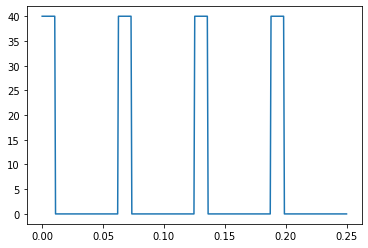

In [7]:
Vs_Sx=np.zeros((97*4,))
for i in range(4):
    Vs_Sx[i*97:i*97+17]=40
plt.plot(np.linspace(0,1/4,97*4),Vs_Sx)

#### Para un tren de pulsos de la forma:

<img src="exp1.png" alt= “” width="60%" height="60%">

$|c_n|=\dfrac{V_0\tau}{T}\left|\dfrac{\sin{\left(\dfrac{1}{2}n\omega_0\tau\right)}}{\dfrac{1}{2}n\omega_0\tau}\right|$

$\angle(c_n)=-n\omega_0\left(t_0+\dfrac{\tau}{2}\right)$

In [16]:
V0=40
T=1/16
t0=0
tau=1/96
w0=2*np.pi/T

mod_c3=(1/T)*V0*tau*np.abs(np.sin(0.5*3*w0*tau)/(0.5*3*w0*tau))
ang_c3=-3*w0*(t0+0.5*tau)

print('c3','mod:',mod_c3,'ang:',ang_c3)

c3 mod: 4.244131815783875 ang: -1.5707963267948966


#### $S= V_{ef}I^{*}_{ef}=\dfrac{V_{ef}V^{*}_{ef}}{Z^{*}_L}=\dfrac{|c_3|^2}{2Z^{*}_L}$

In [25]:
R=5
L=10e-3

ZL=5+1j*w0*L
ZL_C=np.conjugate(ZL)

VL=cmath.rect(mod_c3,ang_c3)
IL=VL/ZL

S=0.5*VL*np.conjugate(IL)
print('S ',S)
print('S2',mod_c3**2/(2*ZL_C))

S  (1.7312770545417016+0.34809390565611426j)
S2 (1.7312770545417013+0.3480939056561142j)


#### 3 - Diseñe un filtro RC pasa alto con frecuencia de corte en 3 kHz

$H(s)=\dfrac{R}{R+\dfrac{1}{Cs}}=\dfrac{RCs}{RCs+1}$

$\omega_c=2\pi f_c \approx 18.85~\mathrm{krad/s}$

$|H(j\omega_c)|=\dfrac{1}{\sqrt{2}} \: \: \: \: \:|H(j\omega_c)~(\mathrm{dB})|=-3~\mathrm{dB}$ 

$|H(j\omega_c)|=\dfrac{RC\omega}{\sqrt{(RC\omega)^2+1}}$

$C=\sqrt{\dfrac{-|H(j\omega_c)|^2}{\omega^2R^2\left(|H(j\omega_c)|^2-1\right)}}$

In [18]:
fc=3e3
wc=2*np.pi*fc
#wc=18.85e3
Hc=1/np.sqrt(2)
R=4.7e3

C2=(-1*Hc**2)/((-1+Hc**2)*(R*wc)**(2))
C=np.sqrt(C2)
print(C)

print('at w=1',turn2dB(R*C),'dB')
print('fc',1/(R*C*2*np.pi))

1.1287584616446476e-08
at w=1 -85.50602246155555 dB
fc 3000.0000000000005


$R=4.7~\mathrm{k}\Omega \: \:C=11.29~\mathrm{nF}$

In [19]:
w_array=np.linspace(1e-2,1e7,2000)
sys = signal.TransferFunction([R*C,0], [R*C,1])
w, mag, phase = signal.bode(sys,w_array)

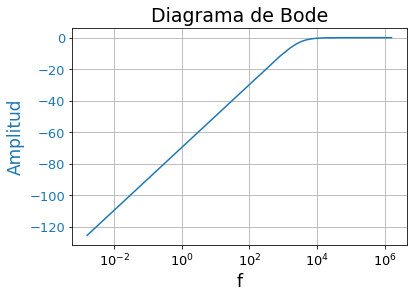

In [20]:
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_title(r'Diagrama de Bode',size=19)
ax1.set_xlabel(r'f',size=17)
ax1.set_ylabel(r'Amplitud', color=color,size=17)
ax1.semilogx(w/(2*np.pi), mag,color=color)
#ax1.semilogx(w, mag,color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='both', labelsize=13)
ax1.grid(True)
plt.show()

### 4 - Diseñe un filtro de pasa banda con un ancho de banda de 1 MHz y una frecuencia de corte nivel alto de 1,1 MHz.

#### Idea: filtro pasa alto (fc=0.1MHz) en cascada con un pasabajo (fc=1.1MHz)

Pasa alto

$H(s)=\dfrac{R}{R+\dfrac{1}{Cs}}=\dfrac{RCs}{RCs+1}$

$\omega_c=2\pi f_c$

$|H(j\omega_c)|=\dfrac{1}{\sqrt{2}} \: \: \: \: \:|H(j\omega_c)~(\mathrm{dB})|=-3~\mathrm{dB}$ 

$|H(j\omega_c)|=\dfrac{RC\omega}{\sqrt{(RC\omega)^2+1}}$

$C=\sqrt{\dfrac{-|H(j\omega_c)|^2}{\omega^2R^2\left(|H(j\omega_c)|^2-1\right)}}$

In [21]:
fc1=0.1e6
wc1=2*np.pi*fc1
R1=4.7e3
Hc1=1/np.sqrt(2)

C1=np.sqrt((-1*Hc1**2)/((-1+Hc1**2)*(R1*wc1)**(2)))
print(C1)

print('at w=1',turn2dB(R1*C1),'dB')
print('fc',1/(R1*C1*2*np.pi))

3.3862753849339427e-10
at w=1 -115.96359736716231 dB
fc 100000.00000000003


$R_1=4.7~\mathrm{k}\Omega \: \:C_1=0.34~\mathrm{nF}$

In [22]:
w_array=np.linspace(5e-2,5e8,int(1e5))
sys = signal.TransferFunction([R1*C1,0], [R1*C1,1])
w, mag, phase = signal.bode(sys,w_array)

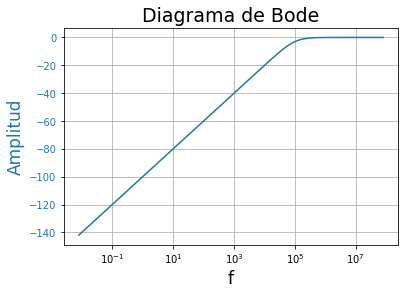

In [23]:
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_title(r'Diagrama de Bode',size=19)
ax1.set_xlabel(r'f',size=17)
ax1.set_ylabel(r'Amplitud', color=color,size=17)
ax1.semilogx(w/(2*np.pi), mag,color=color)
#ax1.semilogx(w, mag,color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax1.grid(True)
plt.show()

#### Pasa bajo

$H(s)=\dfrac{\dfrac{1}{Cs}}{R+\dfrac{1}{Cs}}=\dfrac{1}{RCs+1}$

$\omega_c=2\pi f_c$

$|H(j\omega_c)|=\dfrac{1}{\sqrt{2}} \: \: \: \: \:|H(j\omega_c)~(\mathrm{dB})|=-3~\mathrm{dB}$ 

$|H(j\omega_c)|=\dfrac{1}{\sqrt{(RC\omega)^2+1}}$

$C=\sqrt{\dfrac{1-|H(j\omega_c)|^2}{\omega^2R^2|H(j\omega_c)|^2}}$

In [24]:
fc2=1.1e6
wc2=2*np.pi*fc2
R2=4.7e3
Hc2=1/np.sqrt(2)

C2=np.sqrt((1-Hc2**2)/(Hc2*wc2*R2)**2)
print(C2)

print('at w=1',turn2dB(1),'dB')
print('fc',1/(R1*C1*2*np.pi))

3.0784321681217675e-11
at w=1 0.0 dB
fc 100000.00000000003


$R_2=4.7~\mathrm{k}\Omega \: \:C_2=307.84~\mathrm{nF}$

In [25]:
sys = signal.TransferFunction([1], [R2*C2,1])
w, mag, phase = signal.bode(sys)

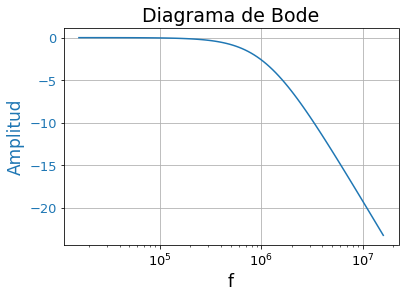

In [26]:
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_title(r'Diagrama de Bode',size=19)
ax1.set_xlabel(r'f',size=17)
ax1.set_ylabel(r'Amplitud', color=color,size=17)
ax1.semilogx(w/(2*np.pi), mag,color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='both', labelsize=13)

ax1.grid(True)
plt.show()

#### Cascada 

$H_{\mathrm{bandpass}}(s)=H_{\mathrm{high-pass}}(s)H_{\mathrm{low-pass}}(s)$

$H(s)=\dfrac{R_1C_1s}{R_1C_1s+1}\dfrac{1}{R_2C_2s+1}=\dfrac{R_1C_1s}{(R_1C_1s+1)(R_2C_2s+1)}$

In [27]:
sym.expand((R1*C1*s+1)*(R2*C2*s+1))

2.3027541736895e-13*s**2 + 1.73623574282068e-6*s + 1

In [28]:
w_array=np.linspace(4e5,1e7,int(1e4))
sys = signal.TransferFunction([R1*C1,0], [R1*C1*R2*C2,R1*C1+R2*C2,1])
w, mag, phase = signal.bode(sys,w_array)

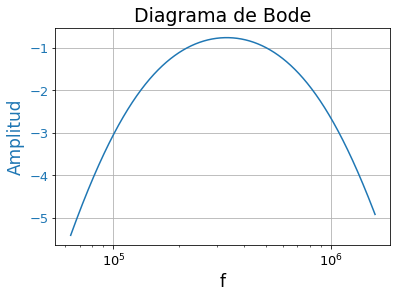

In [29]:
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_title(r'Diagrama de Bode',size=19)
ax1.set_xlabel(r'f',size=17)
ax1.set_ylabel(r'Amplitud', color=color,size=17)
ax1.semilogx(w/(2*np.pi), mag,color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='both', labelsize=13)

ax1.grid(True)
plt.show()

#### 5 - De acuerdo con la figura, halle la la función transferencial $H(s)=\mathrm{V}_C/\mathrm{I}_s$ y elabore el diagrama de Bode de amplitud (puede auxiliarse de un asistente matemático).

![image info](./c5.png)

$V_c=\dfrac{I_2}{sC}$

$I_2=I_s\dfrac{R1+LS}{R1+R2+Ls+1/sC}$

In [30]:
R1=20
R2=182
L=2
C=5e-3

$H(s)=\dfrac{20+2s}{0.01s^2 + 20.91s+1}$

In [31]:
sym.solve(0.01*s**2+20.91*s+1)

[-2090.95217489850, -0.0478251015018334]

In [32]:
s1=-0.0478251015018334
0.01*s1**2+20.91*s1+1

2.220446049250313e-16

In [33]:
sys = signal.TransferFunction([2+20], [0.01,20.91,1])
w, mag, phase = signal.bode(sys)

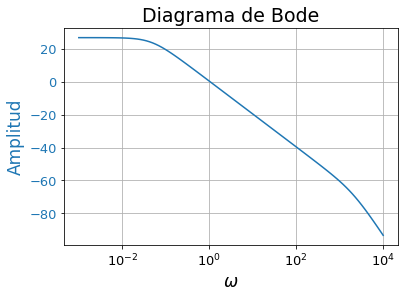

In [34]:
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_title(r'Diagrama de Bode',size=19)
ax1.set_xlabel(r'$\omega$',size=17)
ax1.set_ylabel(r'Amplitud', color=color,size=17)
ax1.semilogx(w, mag,color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='both', labelsize=13)
"""
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel(r'Fase',color=color,size=17)
ax2.semilogx(w, phase,color=color)
ax2.tick_params(axis='y', labelcolor=color)
"""
ax1.grid(True)
plt.show()